# Simple Linear Regression-Task2(Internship)
In this regression task we will predict the percentage of marks that a student is expected to
score based upon the number of hours they studied. This is a simple linear regression task as it
involves just two variables. Data can be found at http://bit.ly/w-data
What will be predicted score if a student study for 9.25 hrs in a day?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url="http://bit.ly/w-data"
std=pd.read_csv(url)
std1 = std
print("Data imported sucessfully")

Data imported sucessfully


In [4]:
std

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Let's explore the data and do some data visualizations

In [5]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
std.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Let's check if their are any missing values
std.isna().sum()

Hours     0
Scores    0
dtype: int64

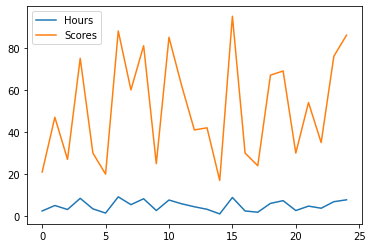

In [42]:
std.plot.line();

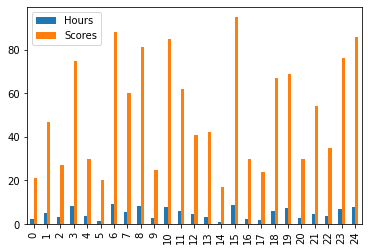

In [41]:
std.plot(kind="bar");

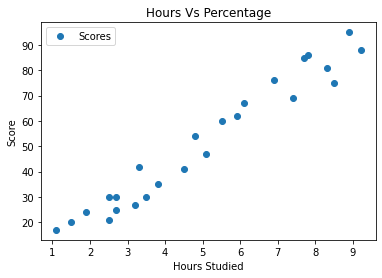

In [8]:
# Let's try a scatterplot
std.plot(x='Hours', y='Scores', style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

## Let's build our linear regression model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [11]:
# Let's split the data into training and test data
X=std.iloc[:,0].values.reshape(-1,1)
y=std.iloc[:,1].values.reshape(-1,1)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
Regressor= LinearRegression()
Regressor.fit(X_train, y_train)
y_predict=Regressor.predict(X_train)

In [15]:
# Let's fit our model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Trained Sucessfully")

Trained Sucessfully


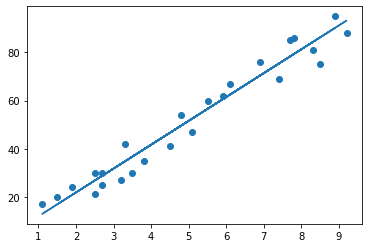

In [16]:
# Let's plot our test data
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [17]:
# Let's check the accuracy scores of our data
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211553


In [19]:
regressor.predict(X_test)

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

Now, we'll test the model to know whether it works!

In [38]:
hrs = 9.25
hrs = np.array(hrs).reshape(-1,1)
preds = regressor.predict(hrs)
print("Score for a student studing 9.25 hours is {}".format(preds[0]))

Score for a student studing 9.25 hours is [93.69173249]
